In [42]:
# Setup and Data Preparation

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Plot styling
sns.set_theme(style='whitegrid')

# 2. Load Titanic dataset
df = sns.load_dataset('titanic')

# --- Data Cleaning ---

# 3. Fill missing 'age' with the median
df['age'].fillna(df['age'].median(), inplace=True)

# 4. Fill missing 'embarked' with the most common port
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


# --- Type Conversions for Efficiency ---

# 6. Cast key columns to 'category'
for col in ['pclass', 'sex', 'embarked']:
    df[col] = df[col].astype('category')

# 7. Create a readable survival column and cast it
df['survived_str'] = (
    df['survived']
      .map({0: 'Died', 1: 'Survived'})
      .astype('category')
)

# --- Quick Sanity Check ---

# 8. Confirm dtypes and missing values
print(df.info())

# 9. Preview the cleaned DataFrame
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      891 non-null    int64   
 1   pclass        891 non-null    category
 2   sex           891 non-null    category
 3   age           891 non-null    float64 
 4   sibsp         891 non-null    int64   
 5   parch         891 non-null    int64   
 6   fare          891 non-null    float64 
 7   embarked      891 non-null    category
 8   class         891 non-null    category
 9   who           891 non-null    object  
 10  adult_male    891 non-null    bool    
 11  deck          203 non-null    category
 12  embark_town   889 non-null    object  
 13  alive         891 non-null    object  
 14  alone         891 non-null    bool    
 15  survived_str  891 non-null    category
dtypes: bool(2), category(6), float64(2), int64(3), object(3)
memory usage: 63.8+ KB
None


C:\Users\vaibh\AppData\Local\Temp\ipykernel_22308\2065369161.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\vaibh\AppData\Local\Temp\ipykernel_22308\2065369161.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived_str
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Died
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Survived
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Survived
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Survived
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Died


C:\Users\vaibh\AppData\Local\Temp\ipykernel_22308\1825269330.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


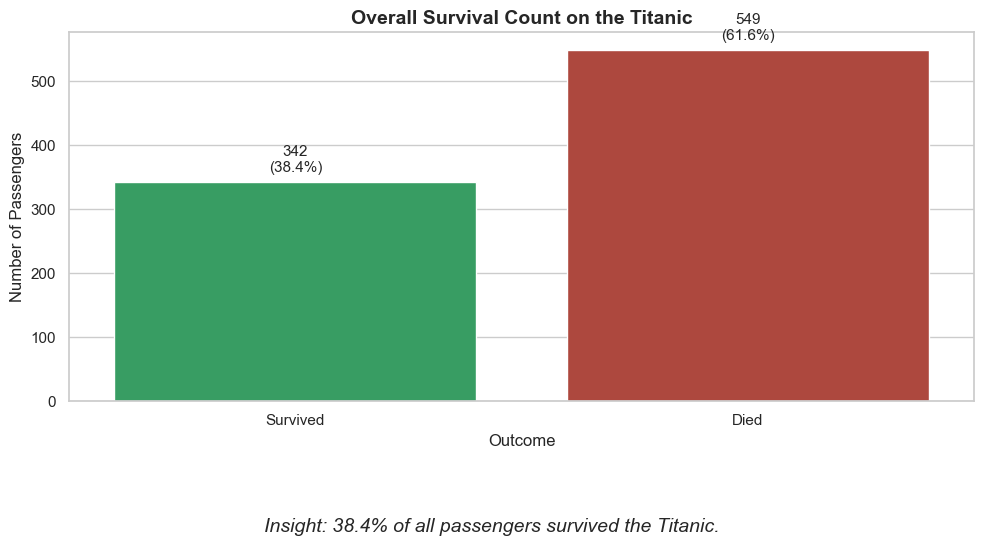

In [43]:
# Univariate Analysis

plt.figure(figsize=(10, 5))

ax = sns.countplot(
    x='survived_str',
    data=df,
    palette={'Survived':'#27ae60', 'Died':'#c0392b'},
    order=['Survived','Died']
)

# Titles and labels
ax.set_title('Overall Survival Count on the Titanic', fontsize=14, weight='bold')
ax.set_xlabel('Outcome', fontsize=12)
ax.set_ylabel('Number of Passengers', fontsize=12)

# Annotate bars with count and percent
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    pct   = count / total
    ax.annotate(
        f"{count}\n({pct:.1%})",
        (p.get_x() + p.get_width()/2, count),
        ha='center', va='bottom',
        xytext=(0, 5), textcoords='offset points',
        fontsize=11
    )

# Dynamic insight text
surv_rate = df['survived'].mean() * 100
insight = f"Insight: {surv_rate:.1f}% of all passengers survived the Titanic."
plt.gcf().text(
    0.5, -0.08, insight,
    ha='center', fontsize=14, style='italic', wrap=True
)

# Tight layout with bottom margin
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


C:\Users\vaibh\AppData\Local\Temp\ipykernel_22308\3892943946.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rates = df.groupby('sex')['survived'].mean().mul(100).round(1)


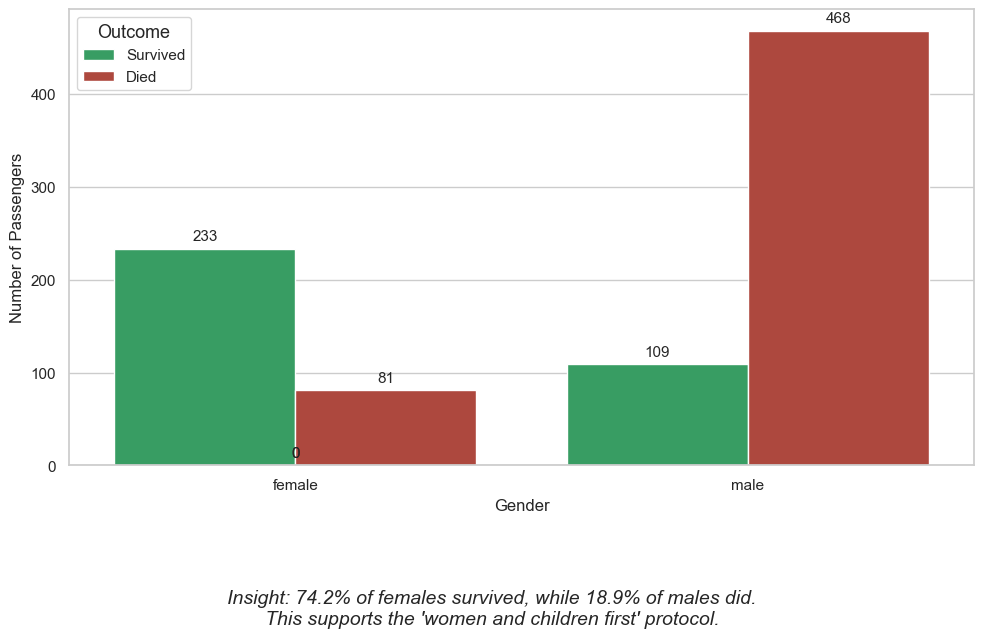

In [44]:
# Bivariate Analysis

fig, ax = plt.subplots(figsize=(10, 6))

# 1. Countplot with explicit palette and hue order to guard against mis-matches
sns.countplot(
    x='sex',
    hue='survived_str',
    data=df,
    ax=ax,
    palette={'Survived': '#27ae60', 'Died': '#c0392b'},
    hue_order=['Survived', 'Died']
)

# 2. Clear, simple axis labels and legend styling
ax.set_xlabel("Gender", fontsize=12)
ax.set_ylabel("Number of Passengers", fontsize=12)
ax.legend(title='Outcome', title_fontsize=13, fontsize=11)

# 3. Annotate bars with exact counts
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(
        count,
        (p.get_x() + p.get_width() / 2, count),
        ha='center', va='center',
        xytext=(0, 9), textcoords='offset points',
        fontsize=11
    )

# 4. Compute dynamic insight text
rates = df.groupby('sex')['survived'].mean().mul(100).round(1)
female_rate, male_rate = rates['female'], rates['male']
insight_text = (
    f"Insight: {female_rate}% of females survived, "
    f"while {male_rate}% of males did.\n"
    "This supports the 'women and children first' protocol."
)

# 5. Add the summary insight, wrapped and tucked safely below the plot
fig.text(
    0.5, -0.05,
    insight_text,
    ha='center',
    fontsize=14,
    style='italic',
    wrap=True
)

# 6. Tighten layout with extra bottom margin so nothing gets clipped
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()


C:\Users\vaibh\AppData\Local\Temp\ipykernel_22308\4141157022.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['sex','pclass'])['survived']


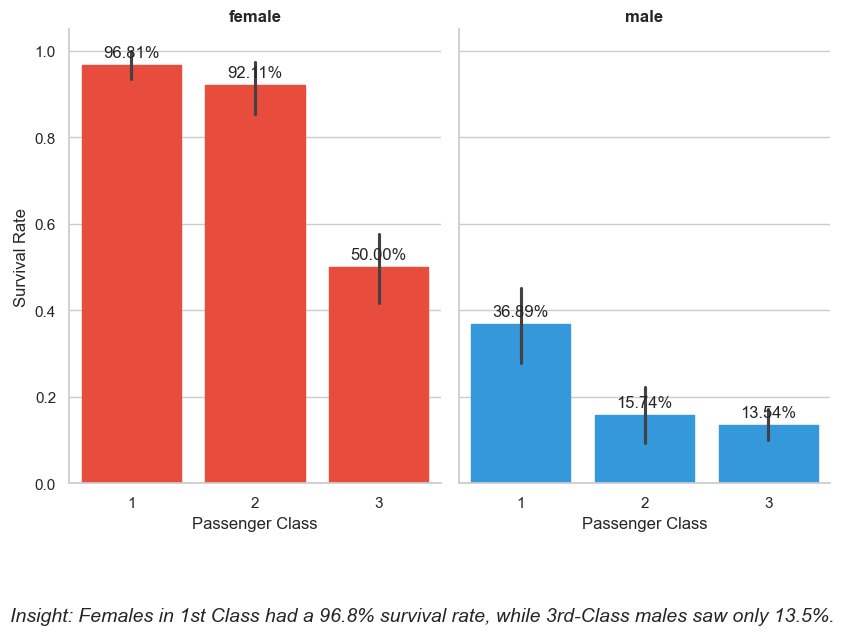

In [45]:
# Multivariate Analysis

# catplot is a figure-level function, so it creates its own figure. We use kind='bar' to automatically calculate the mean of 'survived' (which is the survival rate).
g = sns.catplot(
    data=df,
    x='pclass',
    y='survived',
    col='sex',
    kind='bar',
    height=6, aspect=0.7
)

# 1. Friendly labels & titles
g.set_axis_labels("Passenger Class", "Survival Rate")
g.set_titles(col_template="{col_name}", fontweight='bold')

# 2. Recolor + annotate in one pass
color_map = {'male': '#3498db', 'female': '#e74c3c'}
for ax in g.axes.flat:
    sex = ax.get_title()
    for p in ax.patches:
        p.set_color(color_map[sex])
        ax.annotate(f'{p.get_height():.2%}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9), textcoords='offset points',
                    fontsize=12)

# 3. Dynamic insight
surv_rates = (
    df
    .groupby(['sex','pclass'])['survived']
    .mean()
    .mul(100)
    .round(1)
    .unstack()
)
female_1st = surv_rates.loc['female', 1]
male_3rd   = surv_rates.loc['male',   3]
insight = (
    f"Insight: Females in 1st Class had a {female_1st}% survival rate, "
    f"while 3rd-Class males saw only {male_3rd}%."
)
g.fig.text(0.5, -0.05, insight, ha='center', fontsize=14, style='italic', wrap=True)

# 4. Make room at the bottom so nothing gets clipped
g.fig.tight_layout(rect=[0, 0.07, 1, 1])
plt.show()
